# Assignment 4

## Instructions
<ul>
    <li> Ensure that this assignment is your own work. PLagiarism will not be tolerated </li>
    <li> Ensure that all cells of this notebook run without error when run in order </li>
    <li> Follow the late day policy. Submit assignments on time </li>
    <li> Provide clear explanation for the algorithms you implement </li>
</ul>
Date released: 26/10/2020 

Due date: 01/11/2020 

Approximate time needed: 6-7 hours
    
## DLT and Epipolar Lines

The goal of this assignment is to aid your understanding of the Direct Linear Transform as well as Epipolar geometry.

For the first part of the assignment you will find correspondences between 2D-3D points and estimate the P Matrix. You will then be required to estimate Camera Parameters from this P matrix.

The second part of this assignment will require you to construct epipolar lines on two corresponding images.

---
## 4.1
### Generating Correspondences
The first step to perform DLT is to generate correspondences. The cell below opens a new window. Clicking anywhere on the image should give you the pixel location of the image. Once you're done clicking, close the image window. The cell after displays the points you have clicked.

In [12]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


image_points = []
fig = plt.figure(figsize=(20,30))

img=mpimg.imread('Images/dlt1.jpeg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    # print(ix, iy)
    image_points.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

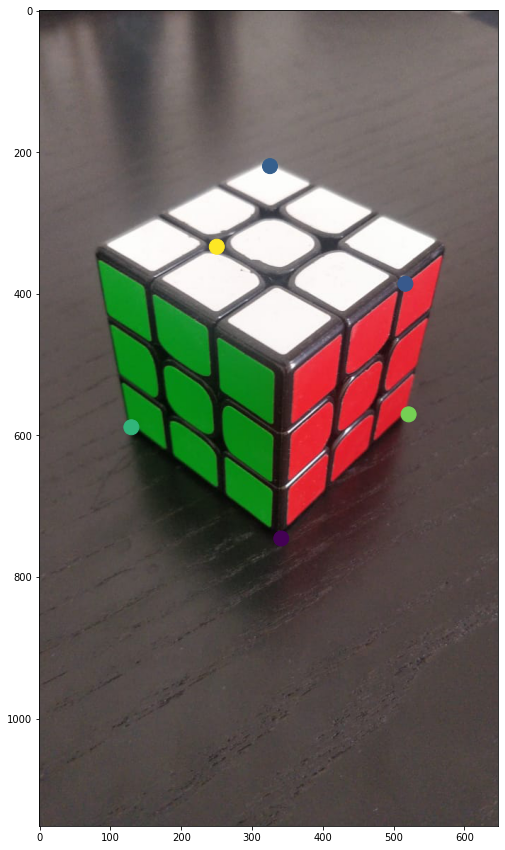

In [13]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('Images/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

After generating pixel locations, you have to generate the corresponding world points. You have the freedom to chose which point you want as origin. You can consider each side as 4 units.

Ensure that the ordering of your points matches the ordering of image points. Keep track of the sequence of corners clicked.

![100,700,1000.png](./pic.png)

In [14]:
#We'll rename image_points to x to match textbook convention
x = image_points
# X represents the 3D world points
X = []
#Add your points here
X.append([0,0,0])
X.append([4,0,0])
X.append([8/3,0,4])
X.append([4,4,4])
X.append([4/3,8/3,4])
X.append([0,4,0])
#Add them as 3D points only
# X.append([1,0,0])

X = np.array(X)

Now that we have the correspondences, we can estimate the P matrix. Implement the DLT function that returns the P matrix

Quick recap: x_i = P * X_i where (x_i, X_i) is the ith correspondence, and P is a 3x4 dimensional matrix. P is further decomposed as P = K * [ R | T].


In [15]:
#Helper functions
#appends a ones column to input
def hom_coords(x,X):
#     print(x,X)
#     print(x.shape,X.shape)
    n = x.shape[0]
    size = (n,1)
    ones = np.ones(size)
    x = np.concatenate(
        (x,ones),
        axis = 1)
    X = np.concatenate(
        (X,ones),
        axis = 1)
    return x, X

x,X = hom_coords(x,X)
# print(x,X)

#### Explanation

Edit this cell and explain the DLT algorithm:

Let us first start off by taking a pair of corresponding points.



$
\begin{bmatrix}
    x_{i}        \\
    y_{i}  \\
    z_{i}
\end{bmatrix}
= 
\begin{bmatrix}
    p_{11}  &  p_{12} & p_{13}  &  p_{14}     \\
    p_{21}  &  p_{22} & p_{23}  &  p_{24}     \\  
    p_{31}  &  p_{32} & p_{33}  &  p_{34}     
\end{bmatrix} 
\begin{bmatrix}
    X_{i}        \\
    Y_{i}  \\
    Z_{i}   \\
    1
\end{bmatrix} 
$

After Matrix Multiplication

$$ x_{i} =  p_{11}*X_{i} +   p_{12}*Y_{i} + p_{13}*Z_{i}  +  p_{14} $$
$$ y_{i} =  p_{21}*X_{i} +   p_{22}*Y_{i} + p_{23}*Z_{i}  +  p_{24} $$
$$ z_{i} =  p_{31}*X_{i} +   p_{32}*Y_{i} + p_{33}*Z_{i}  +  p_{34} $$

However, we know that $ x_{i} = \frac{x_{i}}{z_{i}}$ and $ y_{i} = \frac{y_{i}}{z_{i}}$

We can now write the above equation in the matrix form-

$
\begin{bmatrix}
   X_{i} & Y_{i} & Z_{i} & 1 & 0 & 0 & 0 & 0 & -X_{i}*x_{i} & -Y_{i}*x_{i} & -Z_{i}*x_{i} &  -x_{i}       \\
   0 & 0 & 0 & 0 &  X_{i} & Y_{i} & Z_{i} & 1 & -X_{i}*y_{i} & -Y_{i}*y_{i} & -Z_{i}*y_{i} &  -y_{i} 
\end{bmatrix}
\begin{bmatrix}
    p_{11}  \\
      p_{12} \\
       p_{13} \\ 
         p_{14}     \\
    p_{21}  \\
      p_{22} \\
       p_{23}  \\
         p_{24}     \\  
    p_{31}  \\
      p_{32} \\
       p_{33}  \\
         p_{34}     
\end{bmatrix} 
= 
\begin{bmatrix}
    0 \\   
\end{bmatrix} 
$

We can also write this as- 

$ A*P = 0 $

The above equations are for a single pair of correspondences. For multiple correspondences, we keep appending more pairs of rows to the A matrix, which can be seen in the code below.

In [16]:
#DLT function takes as input 
#the image points and world points
#return a 3x4 matrix
def DLT(x,X):
    """
    your code here
    """
    P = np.random.randn(3,4)
    A = []
    for i in range(x.shape[0]):
        A.append([X[i,0],X[i,1],X[i,2],1,0,0,0,0,-X[i,0]*x[i,0],-X[i,1]*x[i,0],-X[i,2]*x[i,0],-x[i,0]])
        A.append([0,0,0,0,X[i,0],X[i,1],X[i,2],1,-X[i,0]*x[i,1],-X[i,1]*x[i,1],-X[i,2]*x[i,1],-x[i,1]])
#         print(A)
    A = np.asarray(A,dtype=np.float64)
#     print(A.shape)
    U,D,VT= np.linalg.svd(A)
#     print(VT.shape)
    P = np.array(VT[11,:]).reshape(3,4)
    P = P/P[2,3]
    return P

P_final = DLT(x,X)
print("The final p matrix is")
print(P_final)

The final p matrix is
[[ 7.33007280e+01 -4.92382343e+01 -2.24649375e+01  3.42496070e+02]
 [-1.22283142e+01 -2.07228367e+01 -9.48898554e+01  7.45669899e+02]
 [ 5.52226674e-02  3.18867536e-02 -6.98957003e-02  1.00000000e+00]]


## Analysing P

The next part of this question is to analyse how good our estimate is. Report the reprojection error of your P matrix

In [17]:
#Get reprojected points
def get_points(P,X):
    points = P@X.T
    points = points / points[2]
    points = points.T[:,0:2]
    return points

#Get reprojection error
def get_err(x, X, P):
    points = get_points(P, X)
    """
    find the MSE between reprojected points
    and x
    """
    x_temp = x[:,0:2]
    err = np.sum((x_temp-points)**2)/len(x_temp)
    #to err is to human
    return err
error = get_err(x, X, P_final)
print("The MSE between calculated and actual image points is",error)

The MSE between calculated and actual image points is 1.5925718168027603


Given the P matrix, we can estimate K, R and T. Write a function that returns K,R,T given P.
Note: 
P = K * [R | T] where K is a 3x3 matrix and [R | T], P are 3x4 matrices

In [18]:
def ret_RKT(P):
    """
    """
    H = np.array(P[:,0:3]).reshape(3,3)
    h = np.array(P[:,3]).reshape(3,1)
    #R= print(P)
    #K = R
    #T = R
    #print(h.shape)
    #print(H)
    H1 = np.linalg.inv(H)
    X0 = -np.dot(H1,h)
    
    #print(H1,h)
    R1, K1 = np.linalg.qr(H1)
    R = R1.T
    T = np.dot(R,-X0)
    K = np.linalg.inv(K1)
    K = K/K[-1,-1]
    return R, K , T 
R,K,T = ret_RKT(P_final)
print("The rotation matrix is")
print(R)
print("The K matrix is")
print(K)
print("The translation matrix is")
print(T)
T= T.reshape((3))
K= K.reshape((3,3))
P_recovered = np.empty((3,4))
P_recovered[:3,:3] = K@R
P_recovered[:,3] = K@T
P_recovered /= P_recovered[-1,-1]
print("The recovered P matrix is")
print(P_recovered)
print("The original P matrix is")
print(P_final)
print("As we can see, they are the same")

The rotation matrix is
[[-0.58884034  0.80212723 -0.09929225]
 [-0.55910763 -0.49295908 -0.66662583]
 [-0.58366575 -0.33702113  0.73874965]]
The K matrix is
[[ 850.05996956   18.33621435  452.20563078]
 [  -0.         -848.80563226  591.65507593]
 [   0.            0.            1.        ]]
The translation matrix is
[[  1.32271828]
 [  1.91779021]
 [-10.5693147 ]]
The recovered P matrix is
[[ 7.33007280e+01 -4.92382343e+01 -2.24649375e+01  3.42496070e+02]
 [-1.22283142e+01 -2.07228367e+01 -9.48898554e+01  7.45669899e+02]
 [ 5.52226674e-02  3.18867536e-02 -6.98957003e-02  1.00000000e+00]]
The original P matrix is
[[ 7.33007280e+01 -4.92382343e+01 -2.24649375e+01  3.42496070e+02]
 [-1.22283142e+01 -2.07228367e+01 -9.48898554e+01  7.45669899e+02]
 [ 5.52226674e-02  3.18867536e-02 -6.98957003e-02  1.00000000e+00]]
As we can see, they are the same


Reproject the world points with P matrix you have obtained via DLT:

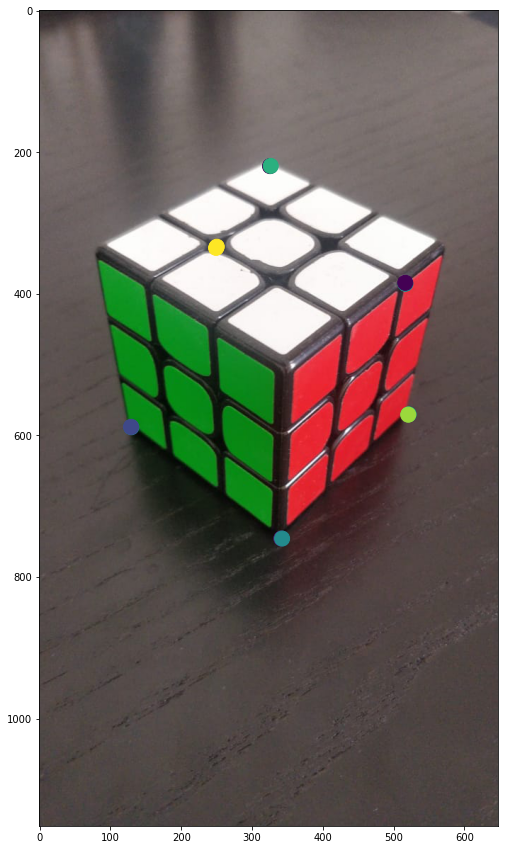

In [19]:
re_proj = get_points(P_final, X)
#code to plot these on the image
%matplotlib inline
N = len(re_proj)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('Images/dlt1.jpeg')
imgplot = plt.imshow(img)

color_1 = np.random.rand(N)
color_2 = np.random.rand(N)
area = (15 * np.ones(N))**2 
plt.scatter(image_points[:,0], image_points[:,1], c=color_1, s=area)
plt.scatter(re_proj[:,0], re_proj[:,1], c=color_2, s=area)
plt.show()

### Zhangs method

For this task, use the inbuilt Opencv function to estimate the K matrix of a camera. Use the checkerboard images 5456-5470 in images/zhangs folder for this task. Familiarize yourself with the different parameters for this method.

The corners in the image are
[[[1070.2032   582.81335]]

 [[1512.992    584.78436]]

 [[1954.1124   585.6685 ]]

 [[2395.1187   586.4151 ]]

 [[2832.522    584.99756]]

 [[3272.218    584.6819 ]]

 [[3711.0713   583.4555 ]]

 [[4151.2583   579.9861 ]]

 [[1074.9347  1026.8362 ]]

 [[1516.9746  1027.6422 ]]

 [[1958.0846  1027.994  ]]

 [[2397.0227  1028.2725 ]]

 [[2834.3784  1027.5978 ]]

 [[3273.0283  1026.7178 ]]

 [[3711.7568  1025.6538 ]]

 [[4151.378   1023.4543 ]]

 [[1078.1901  1469.98   ]]

 [[1519.5347  1470.081  ]]

 [[1960.5327  1469.762  ]]

 [[2398.99    1469.547  ]]

 [[2836.0527  1468.7384 ]]

 [[3274.167   1468.3231 ]]

 [[3712.7805  1467.3751 ]]

 [[4152.131   1465.7449 ]]

 [[1081.4761  1910.0092 ]]

 [[1522.0201  1908.4692 ]]

 [[1962.17    1907.5983 ]]

 [[2401.2317  1907.1764 ]]

 [[2837.9822  1907.1615 ]]

 [[3276.0596  1906.3057 ]]

 [[3714.383   1905.3525 ]]

 [[4153.469   1904.4017 ]]

 [[1082.9141  2351.6633 ]]

 [[1524.1573  2349.888  ]]

 [[1963.502   2348.

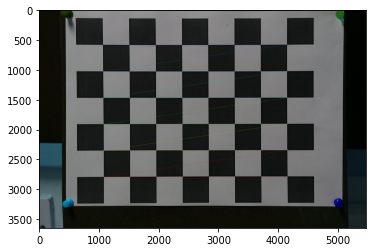

The corners in the image are
[[[1204.3492   662.7149 ]]

 [[1600.5674   672.9132 ]]

 [[2002.7529   682.5686 ]]

 [[2410.375    691.9857 ]]

 [[2820.7336   700.025  ]]

 [[3243.7673   709.1492 ]]

 [[3673.667    717.83594]]

 [[4111.217    724.82733]]

 [[1191.7726  1085.8981 ]]

 [[1588.8207  1098.6228 ]]

 [[1990.7196  1111.112  ]]

 [[2397.6895  1123.9529 ]]

 [[2807.8386  1136.3452 ]]

 [[3229.3892  1148.7045 ]]

 [[3658.4744  1161.2832 ]]

 [[4094.7551  1173.141  ]]

 [[1178.6967  1507.9768 ]]

 [[1574.3328  1523.9387 ]]

 [[1976.6012  1539.2444 ]]

 [[2382.96    1555.4633 ]]

 [[2794.9756  1571.2866 ]]

 [[3215.3818  1587.6616 ]]

 [[3643.2336  1604.1951 ]]

 [[4079.5015  1620.5248 ]]

 [[1165.6982  1927.1497 ]]

 [[1560.5665  1945.0575 ]]

 [[1961.0681  1963.798  ]]

 [[2369.211   1983.0616 ]]

 [[2781.4836  2003.0273 ]]

 [[3201.3704  2023.1516 ]]

 [[3629.0005  2043.4271 ]]

 [[4063.562   2064.2354 ]]

 [[1151.3534  2348.1448 ]]

 [[1543.857   2369.0532 ]]

 [[1945.4169  2390.

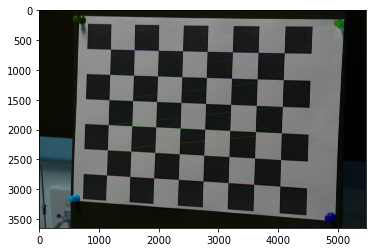

The corners in the image are
[[[1211.844    659.63666]]

 [[1663.1089   657.48834]]

 [[2102.285    653.9789 ]]

 [[2532.2947   650.59686]]

 [[2951.8062   645.45197]]

 [[3358.506    641.795  ]]

 [[3754.8586   637.4941 ]]

 [[4145.2812   631.7961 ]]

 [[1233.8765  1130.7686 ]]

 [[1682.0345  1121.5157 ]]

 [[2120.3345  1112.4194 ]]

 [[2547.4355  1103.3652 ]]

 [[2965.802   1093.5931 ]]

 [[3372.3665  1084.3832 ]]

 [[3768.5989  1075.3534 ]]

 [[4159.09    1064.9819 ]]

 [[1253.3073  1600.9185 ]]

 [[1701.8785  1585.5955 ]]

 [[2139.0544  1570.0337 ]]

 [[2565.4302  1555.3827 ]]

 [[2979.9653  1540.4985 ]]

 [[3386.4     1526.4803 ]]

 [[3784.1292  1512.2708 ]]

 [[4173.5513  1498.117  ]]

 [[1272.9633  2067.886  ]]

 [[1720.857   2045.3457 ]]

 [[2157.5825  2024.0831 ]]

 [[2581.7205  2003.7495 ]]

 [[2995.918   1984.3068 ]]

 [[3402.171   1964.8544 ]]

 [[3799.8066  1945.7434 ]]

 [[4189.743   1927.1012 ]]

 [[1292.1798  2537.0889 ]]

 [[1742.6962  2508.3606 ]]

 [[2177.0635  2480.

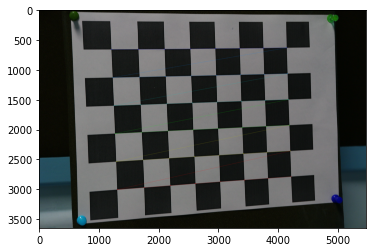

The corners in the image are
[[[1340.9567   656.37036]]

 [[1761.8928   637.52545]]

 [[2167.442    618.85675]]

 [[2560.1755   600.35474]]

 [[2940.147    581.4043 ]]

 [[3301.2595   563.8369 ]]

 [[3648.5322   546.41156]]

 [[3987.7903   528.50604]]

 [[1381.3464  1137.8821 ]]

 [[1797.5035  1109.489  ]]

 [[2200.8025  1081.6182 ]]

 [[2588.953   1055.0859 ]]

 [[2967.2134  1028.7864 ]]

 [[3327.6055  1003.17255]]

 [[3674.8674   978.8783 ]]

 [[4013.3071   953.61993]]

 [[1419.0677  1617.3934 ]]

 [[1835.2592  1579.7057 ]]

 [[2235.75    1542.8873 ]]

 [[2622.3884  1507.8958 ]]

 [[2994.018   1473.8036 ]]

 [[3354.23    1441.0822 ]]

 [[3702.4456  1408.6683 ]]

 [[4039.4043  1377.6737 ]]

 [[1456.376   2092.0164 ]]

 [[1871.2247  2044.1696 ]]

 [[2270.8655  1998.8652 ]]

 [[2653.1436  1955.6543 ]]

 [[3023.4766  1914.2214 ]]

 [[3382.37    1873.7961 ]]

 [[3730.0774  1834.138  ]]

 [[4067.2803  1796.749  ]]

 [[1494.1809  2567.4604 ]]

 [[1911.9515  2510.589  ]]

 [[2307.3481  2456.

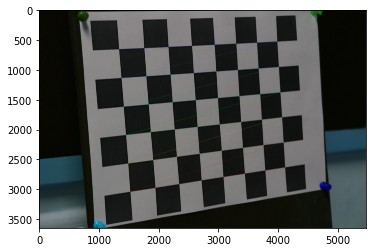

The corners in the image are
[[[1337.3855   605.0644 ]]

 [[1716.7507   625.14386]]

 [[2103.3577   644.88416]]

 [[2496.9265   665.0799 ]]

 [[2895.123    683.753  ]]

 [[3308.9084   704.26733]]

 [[3731.7502   724.3095 ]]

 [[4164.1772   742.77106]]

 [[1314.1957  1022.93475]]

 [[1694.2863  1046.9796 ]]

 [[2080.3293  1070.6633 ]]

 [[2473.6702  1095.3596 ]]

 [[2871.0127  1119.6344 ]]

 [[3282.7842  1144.2921 ]]

 [[3704.2512  1169.3453 ]]

 [[4134.825   1194.2424 ]]

 [[1290.7009  1440.0297 ]]

 [[1668.6989  1467.4921 ]]

 [[2055.069   1495.3883 ]]

 [[2447.2068  1524.2694 ]]

 [[2847.181   1553.1798 ]]

 [[3257.0264  1582.9431 ]]

 [[3676.4023  1613.6067 ]]

 [[4106.2095  1643.9384 ]]

 [[1267.1598  1853.1528 ]]

 [[1644.1189  1884.0258 ]]

 [[2028.255   1916.2306 ]]

 [[2422.4465  1949.5109 ]]

 [[2821.762   1983.4935 ]]

 [[3230.9165  2017.815  ]]

 [[3649.6543  2053.0562 ]]

 [[4077.5908  2089.4712 ]]

 [[1241.9908  2267.3525 ]]

 [[1615.9004  2302.6038 ]]

 [[2001.0941  2338.

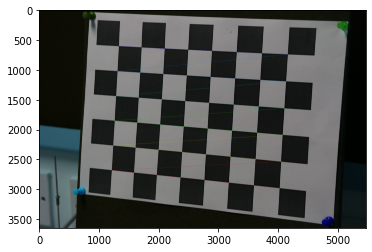

The corners in the image are
[[[1390.3007   790.1523 ]]

 [[1767.2228   802.3474 ]]

 [[2140.2478   813.1503 ]]

 [[2509.7964   823.17163]]

 [[2875.188    830.6805 ]]

 [[3236.2454   841.85876]]

 [[3593.0417   853.2743 ]]

 [[3948.419    861.9849 ]]

 [[1395.7584  1145.6888 ]]

 [[1775.0868  1156.9341 ]]

 [[2150.7637  1166.5435 ]]

 [[2522.4666  1175.8763 ]]

 [[2890.006   1182.1437 ]]

 [[3254.4353  1191.1464 ]]

 [[3614.5117  1200.8125 ]]

 [[3972.854   1207.6334 ]]

 [[1400.3854  1508.2618 ]]

 [[1782.7389  1516.6361 ]]

 [[2161.5588  1524.6698 ]]

 [[2535.9778  1532.2607 ]]

 [[2905.3206  1539.2252 ]]

 [[3272.6633  1546.5925 ]]

 [[3636.5923  1553.2386 ]]

 [[3997.5688  1559.8997 ]]

 [[1404.9487  1874.646  ]]

 [[1790.4303  1879.9454 ]]

 [[2172.1516  1885.6494 ]]

 [[2549.096   1893.2401 ]]

 [[2921.8062  1899.3605 ]]

 [[3291.935   1904.6376 ]]

 [[3659.316   1909.767  ]]

 [[4023.839   1914.3293 ]]

 [[1409.1932  2248.7424 ]]

 [[1799.4012  2250.243  ]]

 [[2183.3962  2255.

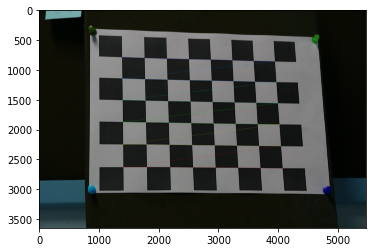

The corners in the image are
[[[1806.4532   627.8019 ]]

 [[2212.9746   651.8904 ]]

 [[2611.8042   674.4597 ]]

 [[3004.0408   695.95715]]

 [[3388.899    714.43616]]

 [[3763.833    735.93835]]

 [[4130.839    756.52783]]

 [[4493.8135   774.4654 ]]

 [[1817.8262  1044.7034 ]]

 [[2224.6604  1064.7769 ]]

 [[2624.9104  1083.4027 ]]

 [[3016.9578  1101.6772 ]]

 [[3403.0955  1117.028  ]]

 [[3780.1223  1134.0404 ]]

 [[4149.4624  1151.3129 ]]

 [[4514.738   1165.9137 ]]

 [[1827.947   1466.2494 ]]

 [[2237.2957  1481.3138 ]]

 [[2639.0552  1496.1923 ]]

 [[3032.7542  1509.9116 ]]

 [[3417.6663  1523.3673 ]]

 [[3796.8865  1536.7723 ]]

 [[4169.54    1549.0243 ]]

 [[4536.428   1561.3932 ]]

 [[1838.4214  1889.6948 ]]

 [[2249.8425  1899.458  ]]

 [[2653.6252  1909.411  ]]

 [[3047.562   1920.4299 ]]

 [[3434.478   1930.6823 ]]

 [[3815.518   1939.9167 ]]

 [[4190.487   1948.883  ]]

 [[4560.1216  1957.2363 ]]

 [[1849.0237  2319.805  ]]

 [[2265.7188  2323.7595 ]]

 [[2669.402   2330.

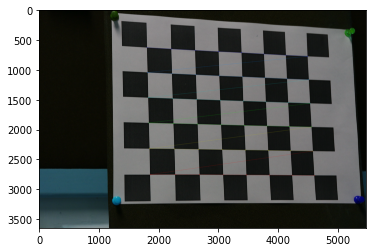

The corners in the image are
[[[1143.6606  1020.09845]]

 [[1527.2919  1020.0391 ]]

 [[1904.4993  1019.5815 ]]

 [[2276.582   1020.219  ]]

 [[2642.0718  1020.77966]]

 [[2999.9824  1018.9647 ]]

 [[3351.7852  1016.4389 ]]

 [[3700.0063  1014.3924 ]]

 [[1137.538   1399.535  ]]

 [[1517.3768  1394.7476 ]]

 [[1891.9323  1390.8906 ]]

 [[2259.8542  1387.5514 ]]

 [[2622.3086  1385.557  ]]

 [[2978.4065  1381.3372 ]]

 [[3328.234   1376.7142 ]]

 [[3674.561   1372.549  ]]

 [[1129.9985  1773.452  ]]

 [[1507.6735  1766.0759 ]]

 [[1879.4259  1758.3928 ]]

 [[2244.5908  1752.1232 ]]

 [[2603.1865  1745.1351 ]]

 [[2956.895   1738.9192 ]]

 [[3305.6958  1732.6505 ]]

 [[3649.4521  1726.1052 ]]

 [[1122.6425  2139.862  ]]

 [[1497.9452  2128.9492 ]]

 [[1867.0504  2118.8765 ]]

 [[2229.2117  2108.27   ]]

 [[2585.0447  2099.1055 ]]

 [[2936.6929  2090.0828 ]]

 [[3283.4883  2081.212  ]]

 [[3625.975   2073.0989 ]]

 [[1114.9545  2504.2073 ]]

 [[1489.5486  2491.8206 ]]

 [[1854.9768  2477.

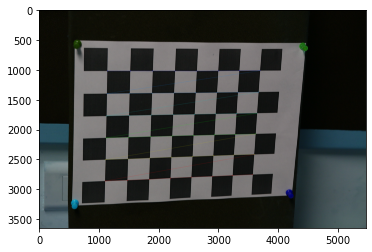

The corners in the image are
[[[ 970.58496  732.9554 ]]

 [[1410.2211   769.1754 ]]

 [[1851.069    804.9563 ]]

 [[2293.549    842.0776 ]]

 [[2735.2612   879.5202 ]]

 [[3183.5347   913.6153 ]]

 [[3634.319    946.6999 ]]

 [[4088.781    980.2678 ]]

 [[ 972.0367  1163.243  ]]

 [[1407.2147  1197.7064 ]]

 [[1843.3088  1233.946  ]]

 [[2280.2964  1269.9537 ]]

 [[2717.0928  1308.73   ]]

 [[3159.6409  1344.179  ]]

 [[3605.373   1378.8822 ]]

 [[4054.215   1414.7457 ]]

 [[ 972.0762  1583.6731 ]]

 [[1402.1403  1619.3348 ]]

 [[1834.0852  1654.6414 ]]

 [[2266.0632  1691.6464 ]]

 [[2699.3374  1728.2137 ]]

 [[3136.6604  1765.308  ]]

 [[3576.8586  1802.6322 ]]

 [[4021.005   1839.9398 ]]

 [[ 972.28754 1992.7164 ]]

 [[1397.3374  2028.3213 ]]

 [[1823.5636  2064.71   ]]

 [[2252.63    2100.25   ]]

 [[2681.6406  2137.9912 ]]

 [[3114.084   2175.8362 ]]

 [[3550.0276  2214.1897 ]]

 [[3988.703   2253.8591 ]]

 [[ 971.1619  2396.4985 ]]

 [[1390.8765  2434.6306 ]]

 [[1813.2443  2469.

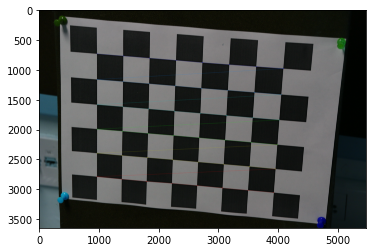

The corners in the image are
[[[2328.057    881.17334]]

 [[2729.6348   822.5926 ]]

 [[3120.098    765.48047]]

 [[3502.0134   710.87616]]

 [[3874.5347   658.6151 ]]

 [[4231.3315   603.6612 ]]

 [[4577.253    549.46625]]

 [[4918.296    496.50284]]

 [[2325.2476  1321.0565 ]]

 [[2719.1016  1254.6238 ]]

 [[3104.532   1191.205  ]]

 [[3478.9343  1130.5038 ]]

 [[3846.7063  1073.2596 ]]

 [[4200.2197  1014.05756]]

 [[4543.125    955.66797]]

 [[4881.4077   899.3743 ]]

 [[2320.6335  1750.147  ]]

 [[2711.2903  1679.0054 ]]

 [[3091.364   1609.2334 ]]

 [[3461.1602  1543.0594 ]]

 [[3819.8657  1477.9888 ]]

 [[4170.083   1415.0117 ]]

 [[4511.996   1353.2682 ]]

 [[4845.375   1293.3124 ]]

 [[2316.6677  2166.5632 ]]

 [[2703.417   2089.3875 ]]

 [[3079.5232  2015.5409 ]]

 [[3442.2415  1942.0391 ]]

 [[3796.8096  1872.676  ]]

 [[4143.6895  1804.8462 ]]

 [[4482.2827  1738.7719 ]]

 [[4813.6577  1674.9604 ]]

 [[2313.672   2576.7412 ]]

 [[2700.3152  2496.5222 ]]

 [[3069.4     2415.

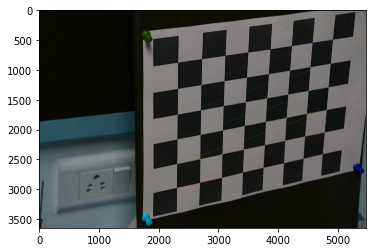

The corners in the image are
[[[1689.4054  1180.4631 ]]

 [[2022.9011  1149.5752 ]]

 [[2350.9438  1118.801  ]]

 [[2674.7876  1089.3091 ]]

 [[2993.209   1060.763  ]]

 [[3303.7595  1030.4951 ]]

 [[3608.3708  1000.409  ]]

 [[3910.1868   970.67505]]

 [[1705.5146  1523.2205 ]]

 [[2035.3622  1488.2172 ]]

 [[2361.0974  1454.5253 ]]

 [[2680.8887  1421.8387 ]]

 [[2996.8464  1390.8142 ]]

 [[3305.8914  1358.5575 ]]

 [[3609.2375  1326.434  ]]

 [[3909.4963  1294.8102 ]]

 [[1720.004   1861.9579 ]]

 [[2048.3848  1824.5841 ]]

 [[2371.5002  1787.4816 ]]

 [[2689.29    1752.2324 ]]

 [[3000.6248  1717.1667 ]]

 [[3308.2507  1682.8219 ]]

 [[3611.1272  1648.779  ]]

 [[3909.2805  1615.315  ]]

 [[1734.4211  2194.3518 ]]

 [[2060.7505  2154.0125 ]]

 [[2381.749   2114.899  ]]

 [[2696.41    2075.6445 ]]

 [[3005.8047  2038.402  ]]

 [[3311.557   2001.783  ]]

 [[3612.8062  1965.3928 ]]

 [[3910.0305  1930.2396 ]]

 [[1749.1713  2525.3691 ]]

 [[2075.5767  2483.297  ]]

 [[2393.171   2440.

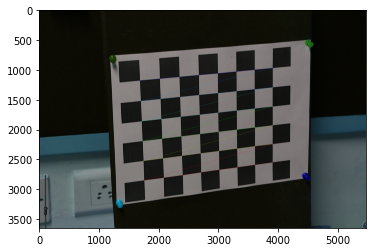

The corners in the image are
[[[1861.6018   812.8736 ]]

 [[2205.266    825.80725]]

 [[2545.089    837.66705]]

 [[2881.9304   849.3204 ]]

 [[3214.1338   859.31036]]

 [[3540.952    870.77106]]

 [[3863.289    881.97424]]

 [[4183.527    891.4354 ]]

 [[1863.7335  1162.8722 ]]

 [[2207.2747  1173.503  ]]

 [[2547.634   1183.4388 ]]

 [[2883.549   1193.309  ]]

 [[3216.1812  1201.564  ]]

 [[3544.2827  1210.8878 ]]

 [[3867.8225  1220.2512 ]]

 [[4189.438   1228.0072 ]]

 [[1865.0212  1515.0394 ]]

 [[2209.7163  1523.2244 ]]

 [[2550.5627  1530.8389 ]]

 [[2887.3572  1538.5765 ]]

 [[3218.8325  1545.602  ]]

 [[3547.6865  1553.0138 ]]

 [[3873.1758  1559.9103 ]]

 [[4195.3438  1566.5383 ]]

 [[1866.442   1866.6456 ]]

 [[2211.8303  1871.7266 ]]

 [[2553.5803  1877.4467 ]]

 [[2890.2163  1883.2704 ]]

 [[3222.631   1889.101  ]]

 [[3552.3354  1894.1827 ]]

 [[3878.7905  1899.1195 ]]

 [[4202.448   1903.9174 ]]

 [[1867.8113  2221.861  ]]

 [[2215.993   2224.1292 ]]

 [[2557.3313  2227.

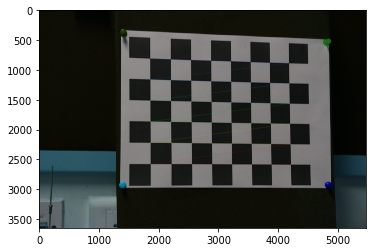

The corners in the image are
[[[1687.7039   616.7215 ]]

 [[2072.186    642.54944]]

 [[2457.92     667.0619 ]]

 [[2845.079    690.21405]]

 [[3231.7708   710.51416]]

 [[3622.0435   735.7692 ]]

 [[4013.6074   761.46875]]

 [[4408.3096   783.7067 ]]

 [[1644.6248   971.0998 ]]

 [[2033.3704   998.94366]]

 [[2422.664   1024.3531 ]]

 [[2812.9243  1050.0934 ]]

 [[3203.4255  1071.6771 ]]

 [[3597.4614  1097.2612 ]]

 [[3993.19    1123.4956 ]]

 [[4391.7915  1147.1387 ]]

 [[1600.2821  1333.4285 ]]

 [[1992.1947  1360.6548 ]]

 [[2386.2136  1387.691  ]]

 [[2780.2827  1414.0629 ]]

 [[3175.0781  1440.1904 ]]

 [[3572.7168  1466.3944 ]]

 [[3972.622   1492.2643 ]]

 [[4375.171   1517.6821 ]]

 [[1555.2444  1700.9093 ]]

 [[1951.3391  1727.945  ]]

 [[2348.5618  1755.4331 ]]

 [[2747.2527  1784.5328 ]]

 [[3146.0745  1812.4479 ]]

 [[3547.764   1839.4419 ]]

 [[3952.207   1866.4178 ]]

 [[4358.8843  1892.6509 ]]

 [[1508.4249  2077.5422 ]]

 [[1908.6138  2102.7305 ]]

 [[2310.079   2132.

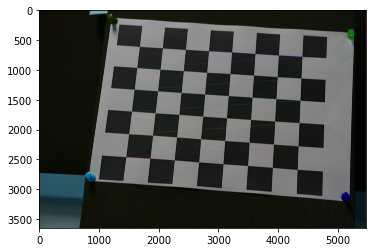

The corners in the image are
[[[1308.5383   692.55225]]

 [[1676.2002   749.00696]]

 [[2035.1478   802.6188 ]]

 [[2386.5488   854.2368 ]]

 [[2729.8232   901.5079 ]]

 [[3061.879    952.7055 ]]

 [[3384.6345  1002.5128 ]]

 [[3702.9746  1048.6954 ]]

 [[1315.325   1053.849  ]]

 [[1684.4801  1107.2012 ]]

 [[2046.4277  1157.0903 ]]

 [[2398.9275  1206.0176 ]]

 [[2745.077   1250.3677 ]]

 [[3080.3118  1296.6349 ]]

 [[3407.3308  1342.673  ]]

 [[3728.8145  1385.2291 ]]

 [[1320.5199  1423.042  ]]

 [[1694.0621  1471.1309 ]]

 [[2058.762   1517.564  ]]

 [[2414.541   1562.1084 ]]

 [[2760.6082  1605.6843 ]]

 [[3099.6558  1648.2366 ]]

 [[3430.9587  1689.2605 ]]

 [[3755.3865  1728.9403 ]]

 [[1325.916   1797.6599 ]]

 [[1703.2756  1840.2008 ]]

 [[2071.564   1881.7765 ]]

 [[2428.8018  1924.3593 ]]

 [[2778.2744  1964.2137 ]]

 [[3120.3386  2002.8479 ]]

 [[3455.2952  2039.9734 ]]

 [[3783.3196  2075.8447 ]]

 [[1331.6753  2180.9575 ]]

 [[1716.0681  2216.9746 ]]

 [[2085.6868  2255.

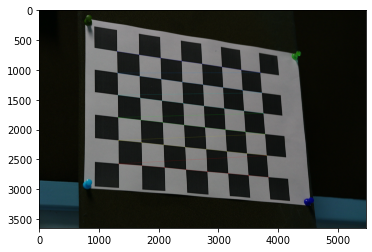

The corners in the image are
[[[1496.7991   564.0673 ]]

 [[1885.3694   632.30347]]

 [[2265.279    697.90356]]

 [[2638.3235   760.6684 ]]

 [[3004.7317   819.2757 ]]

 [[3359.5547   881.5628 ]]

 [[3706.9724   943.7404 ]]

 [[4049.1882  1001.60925]]

 [[1493.7521   926.8753 ]]

 [[1884.8795   993.3159 ]]

 [[2269.05    1056.1388 ]]

 [[2644.8137  1117.261  ]]

 [[3014.4092  1173.1001 ]]

 [[3374.1548  1231.5012 ]]

 [[3726.6938  1290.1525 ]]

 [[4073.2031  1344.596  ]]

 [[1489.1877  1299.2714 ]]

 [[1885.6909  1361.05   ]]

 [[2274.009   1421.329  ]]

 [[2654.2034  1479.2361 ]]

 [[3025.0068  1535.4551 ]]

 [[3389.759   1591.1108 ]]

 [[3747.3354  1644.9354 ]]

 [[4098.7183  1697.948  ]]

 [[1484.7042  1679.25   ]]

 [[1886.1875  1736.2168 ]]

 [[2279.3557  1792.2418 ]]

 [[2661.9592  1849.1575 ]]

 [[3037.545   1903.0604 ]]

 [[3406.7732  1955.1041 ]]

 [[3769.348   2006.2684 ]]

 [[4125.388   2055.129  ]]

 [[1479.9564  2069.6863 ]]

 [[1889.7914  2120.1921 ]]

 [[2285.8057  2174.

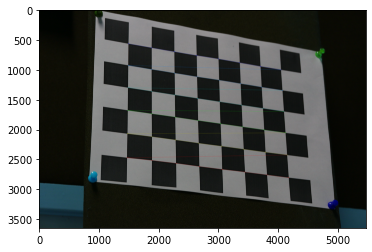

In [71]:
#Code for zhangs here
# print("sdkifho;aisw")
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# print("chekcoooooo")
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images=[]
for i in range(56,71):
#     print("check")
    img =cv2.imread("./Images/Zhangs/IMG_54"+str(i)+".JPG")
    images.append(img)

# print("checkie")
for img in images:
#     print("enter")
#     plt.imshow(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
#     print("after")
    # If found, add object points, image points (after refining them)
    if ret == True:
#         print("true")
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        print("The corners in the image are")
        print(corners)
        img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
        plt.imshow(img)
        plt.show()

cv2.destroyAllWindows()

In [72]:
#TCamera matrix
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print("The camera matrix 'K' obtained using Zhang's Method is")
print(K)

The camera matrix 'K' obtained using Zhang's Method is
[[1.36415095e+04 0.00000000e+00 3.31635924e+03]
 [0.00000000e+00 1.36632518e+04 1.50037425e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


---
## 4.2
### Epipolar lines
#### Task 1

For this task, you have been given two images of the same scene taken from different view-points. The fundamental matrix that encodes their relative geometry as well as a subset of corresponding points have been provided to you. The images are in q2 folder.

Recall that given a point in one image, it's corresponding location in the other image can be found to along a line viz. the epipolar line. The task given to you is to draw the epipolar lines in the second image for each given point in the first image. You have to repeat this for the other image as well. Draw epipolar lines on the first image for the corresponding points in the second image.

The convention used for F is $x'^{T}Fx$ where $x'$ is the location of the point in the second image.

In [34]:
data_file = "q2/data.txt"

with open(data_file, 'r') as f:
    A = f.readlines()
    
img_points1 = A[2:12]
img_points1 = [i.strip()[:-1] for i in img_points1]
img_points1[0] = img_points1[0][1:]
img_points2 = A[15:25]
img_points2 = [i.strip()[:-1] for i in img_points2]
img_points2[0] = img_points2[0][1:]

F_mat = A[28:31]
F_mat = [i.strip()[:-1] for i in F_mat]
F_mat[0] = F_mat[0][1:]

img_1 = []
img_2 = []
F_MAT = []

for i in img_points1:
    img_1.append(np.fromstring(i[1:-1], sep=' '))
    
for i in img_points2:
    img_2.append(np.fromstring(i[1:-1], sep=' '))
    
for i in F_mat:
    F_MAT.append(np.fromstring(i[1:-1], sep=' '))

img_1 = np.array(img_1,int)
img_2 = np.array(img_2,int)
F_mat = np.array(F_MAT)

Provide a clear explanation on your approach for both this task and the next:

###  Finding the Epipolar Lines 

Using the Coplanarity Equation

- F is the fundamental matrix.
- x and x' are the locations of the corresponding points in the first and second image respectively. 
- The coplanarity constraint says that, $x'^{T}Fx = 0$.

To go about finding the epipolar lines, we first homogenize the points. 

For the first image, the epipolar lines are given by $Fx = l_{1}, (\because l_{1}^Tx' = 0)$ where $l_{1}$ is the epipolar line corresponding to the points in first image.

The procedure for finding the epipolar points of the second image is the same except- $F^{T}x' = l_{2}, (\because l_{2}^{T}x = 0)$.

  

### Finding the Epipoles.

- We know that the epipolar lines corresponding to the first image is given by $Fx = l_{1}$.  Thus the epipole must belong to the null space of F. We perform SVD and take the eigen vector corresponding to the smallest eigen value of V.

- For the second image, we follow the same steps as above, except- $F^{T}x' = l_{2}$. Here the epipoles will belong to the null space of F.T .

Now, since the obtained vector will of length 3, but a pixel is two dimensional, we divide the vector by its last element and round off all the values to the nearest integer (as pixels are discrete).



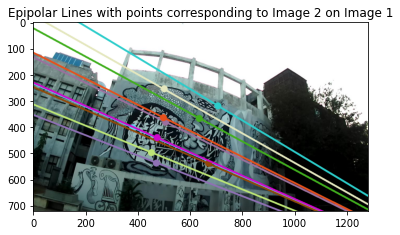

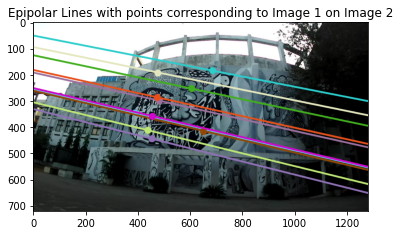

In [75]:
import cv2 
#Write code to plot epipolar lines on the images
image1 = plt.imread("q2/img1.jpg")
image2 = plt.imread("q2/img2.jpg")


m,n = img_1.shape

img1_new = np.ones((m,n+1))
img2_new = np.ones((m,n+1))
img1_new[:,0:2] = img_1
img2_new[:,0:2] = img_2


lines_1 = (F_mat@img1_new.T).T
lines_2 = (F_mat.T@img2_new.T).T

#Function to plot the epipolar lines on the images
def drawlines(img,lines,pts):
    np.random.seed(5)
    r,c,_ = img.shape
    for r, pt1 in zip(lines, pts):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img = cv2.line(img, (x0,y0), (x1,y1),color,5)
        img = cv2.circle(img, tuple(pt1),8,color,10)
    return img

#Drawing the epipolar lines on image 1
img1_epipoles = drawlines(image1,lines_2,img_1);
plt.imshow(img1_epipoles)
plt.title('Epipolar Lines on Image 1')
plt.show()

#Drawing the epipolar lines on image 2
img2_epipoles = drawlines(image2,lines_1,img_2);
plt.imshow(img2_epipoles)
plt.title('Epipolar Lines on Image 2') 
plt.show()

#### Task 2
Report the location of the epipoles.

In [81]:
u, d, v = np.linalg.svd(F_mat)
# print(v.shape)
e = v[-1]
e = e/e[2]
e = np.floor(e[0:2])
print("Epipole of image1 is at pixel location :" )
print(e[0],e[1])

u, d, v = np.linalg.svd(F_mat.transpose())
e = v[-1]
e = e/e[2]
e = np.floor(e[0:2])
print("Epipole of image2 is at pixel location : ")
print(e[0],e[1])

Epipole of image1 is at pixel location :
2159.0 1189.0
Epipole of image2 is at pixel location : 
-5132.0 -949.0
